# R kernel

In [1]:
suppressMessages({
library(ggplot2)
library(Seurat)
library(RColorBrewer)
library(CellChat)
})

In [2]:
mytheme = function(){
theme_bw() +
theme(axis.text.x=element_text(size=6,color='black'),
    axis.text.y=element_text(size=6,color="black"),
    axis.title.y=element_text(size=6,color="black"),
    axis.title.x=element_text(size=6,color="black"),
    #axis.ticks.x=element_blank(),
    axis.ticks.length=unit(.02, "in"),
    axis.line = element_line(color = "black", linewidth = 0.25),
    axis.ticks = element_line(color = "black", linewidth = 0.25),
    strip.text.x = element_text(size = 6,margin = margin(0.08,0,0.08,0, "cm")),
    strip.text.y = element_text(size = 6,margin = margin(0,0.08,0,0.08, "cm")),
    strip.background=element_rect(linewidth=0.25),
    legend.text=element_text(size=6,color="black"),
    legend.title=element_text(size=6,color="black"),
    legend.key.width=unit(0.3,'cm'),
    legend.key.height=unit(0.3,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"),
    panel.spacing = unit(0.1, "cm"),
    plot.title = element_text(size=5),
    panel.border = element_rect(linewidth=0.25,color="black"),
    panel.grid = element_blank()
)
}

## Fig.3A

In [2]:
cellchat_HC = readRDS("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/KC/Cellchat/KC_Immu_HC.rds")
cellchat_DLE = readRDS("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/KC/Cellchat/KC_Immu_DLE.rds")
cellchat_SLE = readRDS("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/KC/Cellchat/KC_Immu_SLE.rds")

In [3]:
object.list <- list( "HC"= cellchat_HC,"DLE" = cellchat_DLE, "SLE" = cellchat_SLE)
cellchat_merge <- mergeCellChat(object.list, add.names = names(object.list), cell.prefix = TRUE)

Warning message in mergeCellChat(object.list, add.names = names(object.list), cell.prefix = TRUE):
“Prefix cell names!”


The cell barcodes in merged 'meta' is  AAACCCAAGCACTCTA-1_1_1_1_1_1_1_1_1 AAACCCACAGAACATA-1_1_1_1_1_1_1_1_1 AAACGAAAGGGTTAGC-1_1_1_1_1_1_1_1_1 AAACGCTTCGCCGTGA-1_1_1_1_1_1_1_1_1 AAAGAACCAAAGACTA-1_1_1_1_1_1_1_1_1 AAAGAACCATAGGCGA-1_1_1_1_1_1_1_1_1 


Warning message in mergeCellChat(object.list, add.names = names(object.list), cell.prefix = TRUE):
“The cell barcodes in merged 'meta' is different from those in the used data matrix.
              We now simply assign the colnames in the data matrix to the rownames of merged 'mata'!”
Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [7]:
source_celltype = c("Granular KC","Spinous KC-1","Spinous KC-2","Spinous KC-3","Spinous KC-4","Basal KC",
                      "IRS","ORS","OB", "HF-SG","Channel KC","Stress KC","Cycling KC")
target_celltype = c('T cells', 'NK cells', 'B cells', 'Plasma cells', 'Macrophage/DC', 'Mast cells') 
group_color = c('HC' = '#d05204', 'DLE' = '#019167', 'SLE' = '#0166aa')

In [8]:
pathway_rank_data <- rankNet(cellchat_merge, mode = "comparison", comparison = c(1:3),stacked = T, do.stat = TRUE,do.flip = T,color.use=group_color,
               font.size=5, sources.use=source_celltype, targets.use=target_celltype, return.data=TRUE)

The text on the y-axis will not be colored for the number of compared datasets larger than 3!



In [9]:
pathway_rank_data = pathway_rank_data$signaling.contribution
pathway_rank_data = pathway_rank_data %>%
    group_by(name) %>%
    mutate(scale = contribution/sum(contribution))

In [10]:
samples = c('HC','DLE','SLE')
all_pathway_names <- c()
for (i in 1:length(samples))
{
    data = pathway_rank_data[pathway_rank_data$scale >0 & pathway_rank_data$group == samples[i],]
    data = data[order(data$scale),]
    pathway_name = as.character(data$name)
    if (samples[i] != samples[1])
    {
       pathway_name = pathway_name[!(pathway_name %in% all_pathway_names)]
    }
    all_pathway_names <- c(pathway_name,all_pathway_names)
}
pathway_name_order = unique(all_pathway_names)
pathway_rank_data$name = factor(pathway_rank_data$name, levels= pathway_name_order)

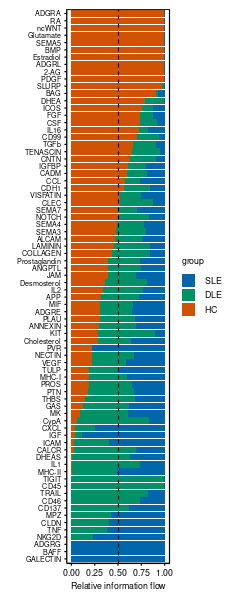

In [13]:
plot = ggplot(pathway_rank_data, aes(x=name, y=scale,fill=group)) +
geom_bar(stat = "identity",, position = "stack", width=0.75) +
geom_hline(yintercept = 0.5, linewidth = 0.25, linetype = "dashed") +
scale_fill_manual(values=group_color) +
labs(y='Relative information flow', x="") +
coord_flip() +
mytheme() +
theme(axis.text.y = element_text(size=4))

options(repr.plot.width=2, repr.plot.height=5)
plot 

## Fig.3B

In [55]:
groups <- c("HC","DLE","SLE")

merge_data = data.frame()
for (i in 1:length(groups))
{
    cellchat <- readRDS(paste0("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/KC/Cellchat/KC_Immu_",groups[i],".rds"))
    data= netVisual_bubble(cellchat,return.data=T, signaling = c('CXCL'),sources.use=source_celltype,targets.use=target_celltype)
    data = data$communication
    data$group <- groups[i]
    merge_data <- rbind(merge_data, data) 
}

Comparing communications on a single object 


Comparing communications on a single object 


Comparing communications on a single object 




In [56]:
merge_data = merge_data[complete.cases(merge_data), ]
#merge_data = merge_data[merge_data$source %in% source_celltype,]
#merge_data = merge_data[merge_data$target %in% target_celltype,]
merge_data$source = factor(merge_data$source, levels=source_celltype)
merge_data$target = factor(merge_data$target, levels=target_celltype)
merge_data$source.target = paste0(merge_data$source, " -> ", merge_data$targe)
merge_data$ligand.receptor = paste0(merge_data$ligand, ' - ', merge_data$receptor)
merge_data$group = factor(merge_data$group, levels=c('HC','DLE','SLE'))

In [57]:
merge_data$ligand.receptor = factor(merge_data$ligand.receptor, levels = rev(c("CXCL9 - CXCR3", "CXCL10 - CXCR3", "CXCL11 - CXCR3", "CXCL16 - CXCR6")))
Stress_KC_CXCL_CXCR = merge_data[merge_data$source=='Stress KC' & merge_data$ligand.receptor != 'CXCL16 - CXCR6',]

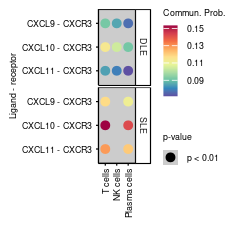

In [62]:
myPalette = rev(brewer.pal(n = 10, name = "Spectral"))

p <- ggplot(Stress_KC_CXCL_CXCR,aes(x=target, y=ligand.receptor, color=prob, size = pval)) +
geom_point(shape=19) +
labs(y="Ligand - receptor", x="", color="Commun. Prob.", size="p-value") +
scale_size(range=c(1, 2), breaks=c(3),labels=c("p < 0.01"),guide="legend") + 
facet_grid(group~., scales="free",space = 'free') +
scale_color_gradientn(colours = myPalette) +
mytheme() +
theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),
    axis.text.y=element_text(size=5),
    strip.text.x = element_text(size = 5, angle=90, hjust= 0, margin = margin(0.1,0,0.1,0, "cm")),
    strip.background=element_rect(size=0.25, color='black', fill="white"),
    panel.background=element_rect(fill='gray80'),
    panel.spacing = unit(0.05, "cm")
     )
options(repr.plot.width =2,repr.plot.height =2)
p

## Fig.3C

Only reorder cell groups but do not rename cell groups!

Reorder cell groups! 



The cell group order before reordering is  B cells Basal KC Channel KC Cycling KC Granular KC HF-SG IRS Macrophage/DC Mast cells NK cells OB ORS Plasma cells Spinous KC-1 Spinous KC-2 Spinous KC-3 Spinous KC-4 Stress KC T cells 
The cell group order after reordering is  Granular KC Spinous KC-1 Spinous KC-2 Spinous KC-3 Spinous KC-4 Basal KC IRS ORS OB HF-SG Channel KC Stress KC Cycling KC T cells NK cells B cells Plasma cells Macrophage/DC Mast cells 


We now re-run computeCommunProbPathway`,`aggregateNet`, and `netAnalysis_computeCentrality`...



Only reorder cell groups but do not rename cell groups!

Reorder cell groups! 



The cell group order before reordering is  B cells Basal KC Channel KC Cycling KC Granular KC HF-SG IRS Macrophage/DC Mast cells NK cells OB ORS Plasma cells Spinous KC-1 Spinous KC-2 Spinous KC-3 Spinous KC-4 Stress KC T cells 
The cell group order after reordering is  Granular KC Spinous KC-1 Spinous KC-2 Spinous KC-3 Spinous KC-4 Basal KC IRS ORS OB HF-SG Channel KC Stress KC Cycling KC T cells NK cells B cells Plasma cells Macrophage/DC Mast cells 


We now re-run computeCommunProbPathway`,`aggregateNet`, and `netAnalysis_computeCentrality`...



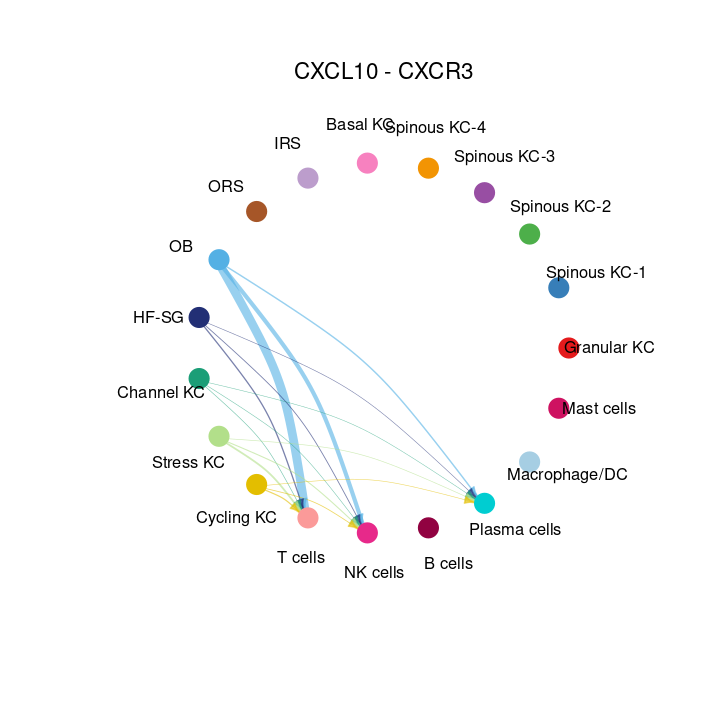

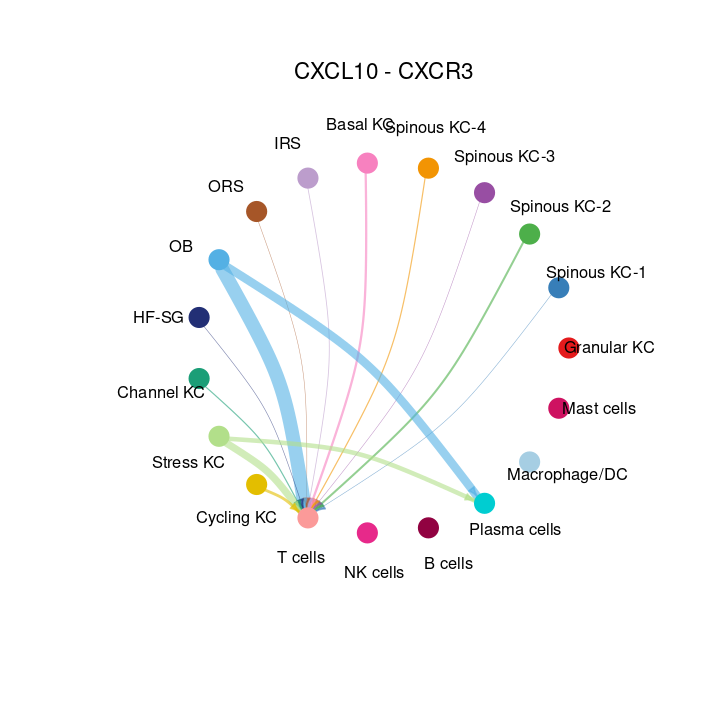

In [67]:
cell_order = c(source_celltype, target_celltype)
groups <- c("DLE","SLE")

for (i in 1:length(groups))
{
    cellchat <- readRDS(paste0("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/KC/Cellchat/KC_Immu_",groups[i],".rds"))
    options(repr.plot.width =6,repr.plot.height =6)
    
    re_order <- cell_order[cell_order %in% rownames(cellchat@net$weight)]
    cellchat <- updateClusterLabels(cellchat, new.order=re_order)
    netVisual_individual(cellchat, signaling =  c("CXCL"), pairLR.use = "CXCL10_CXCR3", layout = "circle", vertex.label.cex = 0.8, 
                          sources.use=source_celltype, targets.use=target_celltype, arrow.size=0.5)
}